# Scoring anchor screens
## PARP anchor screens example

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gpplot
from anchor_score import get_guide_residuals, get_gene_residuals
import statsmodels
from sklearn.decomposition import PCA
import plotly.express as px
import numpy as np

## Data Inputs
In order to calculate residuals for an anchor screen, we need:
1. Log-fold changes from pDNA
2. A dataframe mapping each condition to a reference

For (1), the first column should uniquely identify the sgRNAs in the library and subsequent columns should be experimental conditions

In [3]:
lfc_df = pd.read_csv('https://raw.githubusercontent.com/PeterDeWeirdt/anchor_screen_parp_lfcs/master/parp_example_lfcs.csv')
lfc_df

,Construct Barcode,HAP1_NA_NA_Dropout_Negative_NA_Primary,HAP1_NA_NA_Talazoparib_Negative_NA_Primary,HAP1_PARP1_SSC_Dropout_Negative_NA_Primary,A375_6T_NA_Dropout_Negative_NA_Primary,A375_6T_NA_Olaparib_Negative_NA_Primary,A375_PARP1_sg1_Dropout_Negative_NA_Primary,A375_PARP1_sg2_Dropout_Negative_NA_Primary,OVCAR8_PARP1_sg1_Dropout_Negative_NA_Primary,OVCAR8_PARP1_sg2_Dropout_Negative_NA_Primary,OVCAR8_6T_NA_Dropout_Negative_NA_Primary,OVCAR8_6T_NA_Olaparib_Negative_NA_Primary
0,AAAAAAAATCCGGACAATGG,-1.458226,-1.628705,-1.082445,-0.681480,-0.491799,-1.038584,-0.587899,-0.399530,-0.527329,-0.211934,-0.349172
1,AAAAAAAGGATGGTGATCAA,-0.561917,-0.292398,-0.688619,-0.002494,-0.082166,-0.001301,-0.100738,-0.090818,-0.056908,-0.191232,-0.108749
2,AAAAAAATGACATTACTGCA,-2.258213,-2.786396,-2.339129,-1.676529,-1.430671,-1.987256,-1.963615,-0.880276,-0.853167,-1.100628,-2.484210
3,AAAAAAATGTCAGTCGAGTG,0.359313,0.284927,0.488999,0.728106,1.016521,0.789018,0.654312,0.095294,0.508477,0.605295,0.776061
4,AAAAAACACAAGCAAGACCG,-0.410426,-0.419306,-0.184254,0.262032,0.012150,-0.075652,0.198049,-0.135400,0.023842,0.279924,0.296607
...,...,...,...,...,...,...,...,...,...,...,...,...
77436,TTTGTTTGGATTGCTTCAAG,-2.808418,-2.616433,-2.597637,-2.029180,-2.053288,-2.164989,-1.983398,-0.793110,-1.255786,-1.233959,-2.111485
77437,TTTTACCTTGTTCACATGGA,0.318968,0.374688,0.349834,0.661059,0.836143,0.573049,0.567858,0.271775,0.204736,0.313578,0.583079
77438,TTTTGACTCTAATCACCGGT,0.619506,0.798719,0.601523,0.924819,0.838019,0.947565,0.875311,0.624686,0.463143,0.593159,0.523230
77439,TTTTTAATACAAGGTAATCT,-1.761897,-2.299131,-1.710660,-0.189554,-0.289715,-0.143970,-0.194370,-0.483929,-0.530819,-0.553983,-0.438070


For (2) each anchor or modifier condition (column 1) should be matched with an unperturbed reference condition (column 2). We will calculate the residual between the perturbed and reference conditions.

In [4]:
refernce_condition_df = pd.read_csv('https://raw.githubusercontent.com/PeterDeWeirdt/anchor_screen_parp_lfcs/master/parp_example_mapping.csv')
refernce_condition_df

,Perturbed,Reference
0,OVCAR8_PARP1_sg1_Dropout_Negative_NA_Primary,OVCAR8_6T_NA_Dropout_Negative_NA_Primary
1,OVCAR8_PARP1_sg2_Dropout_Negative_NA_Primary,OVCAR8_6T_NA_Dropout_Negative_NA_Primary
2,OVCAR8_6T_NA_Olaparib_Negative_NA_Primary,OVCAR8_6T_NA_Dropout_Negative_NA_Primary
3,HAP1_PARP1_SSC_Dropout_Negative_NA_Primary,HAP1_NA_NA_Dropout_Negative_NA_Primary
4,HAP1_NA_NA_Talazoparib_Negative_NA_Primary,HAP1_NA_NA_Dropout_Negative_NA_Primary
5,A375_6T_NA_Olaparib_Negative_NA_Primary,A375_6T_NA_Dropout_Negative_NA_Primary
6,A375_PARP1_sg1_Dropout_Negative_NA_Primary,A375_6T_NA_Dropout_Negative_NA_Primary
7,A375_PARP1_sg2_Dropout_Negative_NA_Primary,A375_6T_NA_Dropout_Negative_NA_Primary


## Calculating guide residuals

For each perturbed condition, we fit a regression spline between the perturbed and reference conditions, and calculate residuals from the fit model.  

In [5]:
guide_residuals, model_info, model_fit_plots = get_guide_residuals(lfc_df, refernce_condition_df)

We can look at the fit model for each condition to understand how the residuals are calculated.

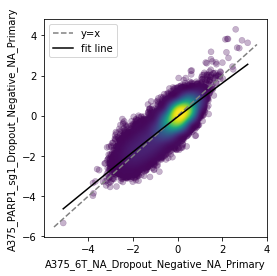

In [7]:
model_fit_plots['A375_PARP1_sg1_Dropout_Negative_NA_Primary']

The function returns guide-level residuals. 

In [8]:
guide_residuals.head()

,Construct Barcode,condition,residual,residual_z,Reference,lfc,lfc_reference
0,AAAAAAAATCCGGACAATGG,OVCAR8_PARP1_sg1_Dropout_Negative_NA_Primary,-0.283948,-1.263479,OVCAR8_6T_NA_Dropout_Negative_NA_Primary,-0.399530,-0.211934
1,AAAAAAAATCCGGACAATGG,OVCAR8_PARP1_sg2_Dropout_Negative_NA_Primary,-0.402598,-1.662283,OVCAR8_6T_NA_Dropout_Negative_NA_Primary,-0.527329,-0.211934
2,AAAAAAAATCCGGACAATGG,OVCAR8_6T_NA_Olaparib_Negative_NA_Primary,-0.150892,-0.356946,OVCAR8_6T_NA_Dropout_Negative_NA_Primary,-0.349172,-0.211934
3,AAAAAAAGGATGGTGATCAA,OVCAR8_PARP1_sg1_Dropout_Negative_NA_Primary,0.006577,0.029267,OVCAR8_6T_NA_Dropout_Negative_NA_Primary,-0.090818,-0.191232
4,AAAAAAAGGATGGTGATCAA,OVCAR8_PARP1_sg2_Dropout_Negative_NA_Primary,0.044845,0.185162,OVCAR8_6T_NA_Dropout_Negative_NA_Primary,-0.056908,-0.191232


As well as information about each model, including the optimal degrees of freedom and the fit constant.

In [9]:
pd.DataFrame(model_info).T.sort_values('const')

,model,deg_fdm,const
HAP1_NA_NA_Talazoparib_Negative_NA_Primary,spline,6,-0.232397
HAP1_PARP1_SSC_Dropout_Negative_NA_Primary,spline,7,-0.213146
A375_PARP1_sg1_Dropout_Negative_NA_Primary,spline,2,-0.187551
A375_6T_NA_Olaparib_Negative_NA_Primary,spline,4,-0.158295
A375_PARP1_sg2_Dropout_Negative_NA_Primary,spline,4,-0.15573
OVCAR8_6T_NA_Olaparib_Negative_NA_Primary,spline,5,-0.134876
OVCAR8_PARP1_sg2_Dropout_Negative_NA_Primary,spline,5,-0.0493769
OVCAR8_PARP1_sg1_Dropout_Negative_NA_Primary,spline,5,-0.0379134


## Calculating gene-level results

In order to summarise results at the gene level, we need a mapping from guides to genes. For this file the first column should identify sgRNAs and the second column should identify gene symbols.

In [10]:
guide_mapping_df = pd.read_csv('https://raw.githubusercontent.com/PeterDeWeirdt/anchor_screen_parp_lfcs/master/brunello_guide_map.csv')

In [11]:
guide_mapping_df

,Construct Barcode,Gene Symbol,Gene ID
0,AAAAAAAATCCGGACAATGG,SLC25A24,29957
1,AAAAAAAGGATGGTGATCAA,FASTKD3,79072
2,AAAAAAATGACATTACTGCA,BCAS2,10286
3,AAAAAAATGTCAGTCGAGTG,GPR18,2841
4,AAAAAACACAAGCAAGACCG,ZNF470,388566
...,...,...,...
87325,TTTTGACTCTAATCACCGGT,INACTIVE_4T_54,INACTIVE_4T_54
87326,TTTTTAATACAAGGTAATCT,NO_SITE_940,NO_SITE_940
87327,TTTTTAATACAAGGTAATCT,INACTIVE_5T_55,INACTIVE_5T_55
87328,TTTTTCTCACCCGATGAATC,NO_SITE_941,NO_SITE_941


We than aggreagate the z-scores at the gene level

In [16]:
gene_residuals = get_gene_residuals(guide_residuals, guide_mapping_df)
filtered_gene_residuals = gene_residuals[(gene_residuals.guides < 8) & (gene_residuals.guides > 1)]

In [17]:
filtered_gene_residuals.sort_values('residual_zscore')

,condition,Gene Symbol,guides,avg_lfc,avg_lfc_reference,residual_zscore,p_value,fdr_bh
68307,HAP1_NA_NA_Talazoparib_Negative_NA_Primary,CENPS,7,-2.148267,-0.584819,-13.045425,6.747929e-39,1.468822e-34
79798,HAP1_NA_NA_Talazoparib_Negative_NA_Primary,POLB,4,-2.351374,-0.404300,-12.145030,6.096060e-34,4.423098e-30
7597,A375_6T_NA_Olaparib_Negative_NA_Primary,HPF1,4,-1.348696,0.047045,-11.933422,7.924768e-33,8.624922e-29
95357,HAP1_PARP1_SSC_Dropout_Negative_NA_Primary,ITPA,4,-2.437766,-0.516921,-11.880409,1.496336e-32,3.257075e-28
68313,HAP1_NA_NA_Talazoparib_Negative_NA_Primary,CENPX,4,-2.528742,-0.776246,-11.034379,2.608486e-28,1.419473e-24
...,...,...,...,...,...,...,...,...
107951,HAP1_PARP1_SSC_Dropout_Negative_NA_Primary,XRCC1,4,-0.117562,-1.686952,9.017107,1.931216e-19,1.323701e-15
3599,A375_6T_NA_Olaparib_Negative_NA_Primary,COP1,4,1.386265,0.380290,9.156387,5.366396e-20,2.920259e-16
41391,A375_PARP1_sg1_Dropout_Negative_NA_Primary,TP53,4,2.785307,1.273800,9.287644,1.577418e-20,3.433567e-16
15230,A375_6T_NA_Olaparib_Negative_NA_Primary,PTDSS1,4,-0.183192,-1.353115,9.421960,4.427451e-21,3.212411e-17


We can see how the z-scores correlate across conditions. We see that the z-scores are largely clustered by cell type, and then perurbation type.

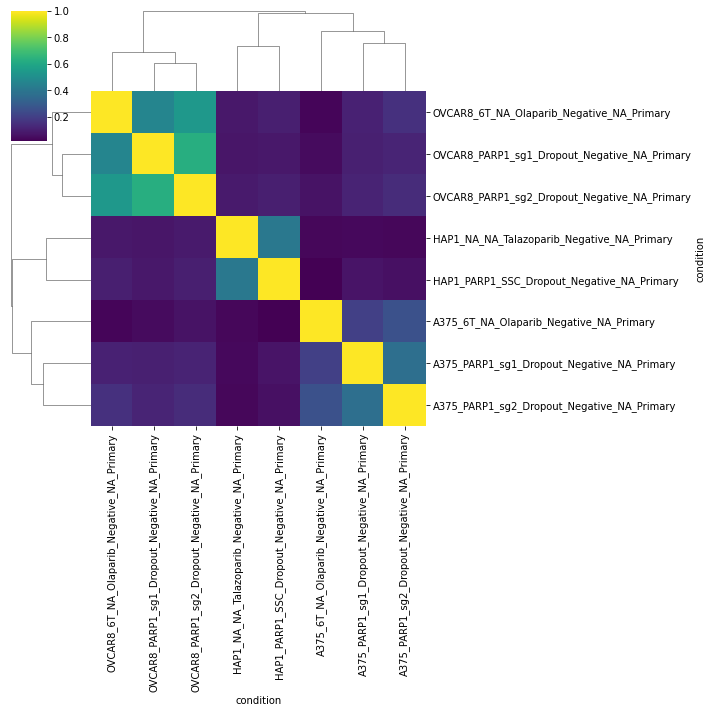

In [18]:
spread_residuals = filtered_gene_residuals.pivot_table(values = 'residual_zscore', columns = 'condition', index= 'Gene Symbol')
sns.clustermap(spread_residuals.corr(), cmap = 'viridis')

To gain more insight, we can plot a PCA of the different conditions and explore which genes score in which conditions. We see that many of the genes that score in the top right (deplete in A375 and HAP1 conditions) are DNA damage repair genes.

**NOTE:** you must have [plotly](https://plotly.com/python/getting-started/) installed to view this visualization. 

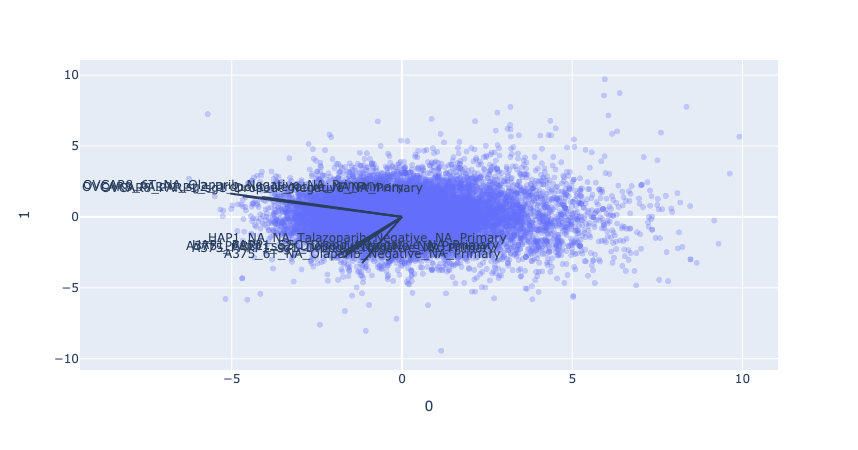

In [25]:
pca = PCA(n_components=2)
components = pca.fit_transform(spread_residuals)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_) * 5
fig = px.scatter(components, x=0, y=1, hover_name = spread_residuals.index, opacity=0.3)
features = spread_residuals.columns.to_list()
for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()